In [28]:
# !pip install pandas numpy matplotlib seaborn scipy
# !pip install sklearn

# !python -m pip --version
# !python -c "import sys,site; print(sys.executable); print(site.getsitepackages())"
# !python -m pip uninstall -y sklearn scikit-learn
# !python -m pip install --force-reinstall --no-deps matplotlib==3.10.0
# !python -m pip install -U matplotlib
# !python -m pip install -U pip setuptools wheel
# !python -m pip install -U scikit-learn
# !python -m pip check



In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import RobustScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import RobustScaler 
from sklearn.impute import SimpleImputer 
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

import matplotlib.pyplot as plt 


In [ ]:
DATA_PATH = r"D:/Archivos de Usuario/Documents/Machine_Learning/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv" # Ajustar al path que tengan para que funcione

telco_df = pd.read_csv(DATA_PATH)
telco_df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [158]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [212]:
telco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [213]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return train_set, val_set, test_set


In [256]:

def find_best_threshold_by_f1(y_true, y_proba_yes, pos_label='Yes', n_steps=201):
    import numpy as np
    from sklearn.metrics import f1_score, precision_score, recall_score
    best_thr, best_f1 = 0.5, -1.0
    best_p, best_r = None, None
    thresholds = np.linspace(0.0, 1.0, n_steps)
    for thr in thresholds:
        y_hat = np.where(y_proba_yes >= thr, pos_label, 'No')
        f1 = f1_score(y_true, y_hat, pos_label=pos_label)
        if f1 > best_f1:
            best_f1 = f1; best_thr = thr
            best_p = precision_score(y_true, y_hat, pos_label=pos_label)
            best_r = recall_score(y_true, y_hat, pos_label=pos_label)
    return best_thr, best_f1, best_p, best_r

def find_threshold_by_recall(y_true, y_proba_yes, target_recall=0.75, pos_label='Yes', n_steps=201):
    import numpy as np
    from sklearn.metrics import f1_score, recall_score
    best_thr = 0.5; best_f1 = -1.0
    thresholds = np.linspace(0.0, 1.0, n_steps)
    for thr in thresholds:
        y_hat = np.where(y_proba_yes >= thr, pos_label, 'No')
        r = recall_score(y_true, y_hat, pos_label=pos_label)
        if r >= target_recall:
            f1 = f1_score(y_true, y_hat, pos_label=pos_label)
            if f1 > best_f1:
                best_f1 = f1; best_thr = thr
    return best_thr, best_f1


In [ ]:
class CategoricalServiceCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._cols = None

    def fit(self, X, y=None):
        self._cols = list(X.columns)
        return self

    def transform(self, X, y=None):
        Xc = X.copy()
        for c in self._cols:
            Xc[c] = (
                Xc[c].astype(str)
                    .str.strip()
                    .replace({'No internet service': 'No', 'No phone service': 'No'})
            )
        return Xc

In [215]:
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._oh = OneHotEncoder(
            sparse_output=False,
            handle_unknown="ignore",
            drop="if_binary"
        )
        self._cat_cols = None
        self._columns_out = None

    def fit(self, X, y=None):
        Xc = X.astype(str)
        self._cat_cols = list(Xc.columns)
        self._oh.fit(Xc)
        self._columns_out = list(self._oh.get_feature_names_out(self._cat_cols))
        return self

    def transform(self, X, y=None):
        Xc = X.astype(str)
        return self._oh.transform(Xc)

    def get_feature_names_out(self, input_features=None):
        cols = input_features if input_features is not None else self._cat_cols
        return self._oh.get_feature_names_out(cols)

In [216]:
class NumericFeaturizer(BaseEstimator, TransformerMixin):
    def __init__(self, add_interaction=True, drop_totalcharges=True):
        self.add_interaction = add_interaction
        self.drop_totalcharges = drop_totalcharges
        self._cols = None

    def fit(self, X, y=None):
        self._cols = list(X.columns)
        return self

    def transform(self, X, y=None):
        Xn = X.copy()
        if 'TotalCharges' in Xn.columns:
            Xn['TotalCharges'] = pd.to_numeric(Xn['TotalCharges'], errors='coerce')

        if self.add_interaction and {'tenure', 'MonthlyCharges'}.issubset(Xn.columns):
            Xn['tenure_x_monthly'] = Xn['tenure'] * Xn['MonthlyCharges']

        if self.drop_totalcharges and 'TotalCharges' in Xn.columns:
            Xn = Xn.drop(columns=['TotalCharges'])

        return Xn

In [ ]:
class DataFramePreparer(BaseEstimator, TransformerMixin):
    """
    Ensambla un ColumnTransformer:
    """
    def __init__(self, add_interaction=True, drop_totalcharges=True, drop_cols=None):
        self.add_interaction = add_interaction
        self.drop_totalcharges = drop_totalcharges
        self.drop_cols = drop_cols if drop_cols is not None else ['customerID']
        self._ct = None
        self._num_cols = None
        self._cat_cols = None
        self._columns_out = None

    def fit(self, X, y=None):
        Xw = X.drop(columns=[c for c in self.drop_cols if c in X.columns], errors='ignore')

        num_cols = list(Xw.select_dtypes(include=['int64', 'float64']).columns)
        if 'TotalCharges' in Xw.columns and 'TotalCharges' not in num_cols:
            num_cols.append('TotalCharges')
        self._num_cols = num_cols

        # categóricas
        self._cat_cols = [c for c in Xw.columns if c not in self._num_cols]

        # pipelines
        num_pipeline = Pipeline([
            ('feats', NumericFeaturizer(add_interaction=self.add_interaction,
                                        drop_totalcharges=self.drop_totalcharges)),
            ('imputer', SimpleImputer(strategy="median")),
            ('rbst_scaler', RobustScaler())
        ])

        cat_pipeline = Pipeline([
            ('clean', CategoricalServiceCleaner()),
            ('oh_df', CustomOneHotEncoder())
        ])

        # ColumnTransformer
        self._ct = ColumnTransformer([
            ("num", num_pipeline, self._num_cols),
            ("cat", cat_pipeline, self._cat_cols),
        ], remainder='drop')

        self._ct.fit(Xw)

        num_out = list(self._num_cols)
        if self.add_interaction and {'tenure','MonthlyCharges'}.issubset(self._num_cols):
            num_out.append('tenure_x_monthly')
        if self.drop_totalcharges and 'TotalCharges' in num_out:
            num_out.remove('TotalCharges')

        oh = self._ct.named_transformers_['cat'].named_steps['oh_df']
        cat_out = list(oh.get_feature_names_out(self._cat_cols))

        self._columns_out = num_out + cat_out
        return self

    def transform(self, X, y=None):
        Xw = X.drop(columns=[c for c in self.drop_cols if c in X.columns], errors='ignore')
        Xt = self._ct.transform(Xw)
        return pd.DataFrame(Xt, columns=self._columns_out, index=X.index)


In [228]:
df = pd.read_csv(DATA_PATH)
df.shape


(7043, 21)

In [229]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [230]:
train_set, val_set, test_set = train_val_test_split(df, stratify='Churn', rstate=42)
print("\nLength of the Training Set:", len(train_set))
print("Length of the Validation Set:", len(val_set))
print("Length of Test Set:", len(test_set))


Length of the Training Set: 4225
Length of the Validation Set: 1409
Length of Test Set: 1409


In [231]:
# Para cada subconjunto, separamos etiquetas de características
X_df  = df.drop("Churn", axis=1)
y_df  = df["Churn"].copy()

X_train = train_set.drop("Churn", axis=1); y_train = train_set["Churn"].copy()
X_val   = val_set.drop("Churn", axis=1);   y_val   = val_set["Churn"].copy()
X_test  = test_set.drop("Churn", axis=1);  y_test  = test_set["Churn"].copy()


In [232]:
data_preparer = DataFramePreparer(
    add_interaction=True,
    drop_totalcharges=True,
    drop_cols=['customerID']
)

In [233]:
data_preparer.fit(X_df)

,add_interaction,True
,drop_totalcharges,True
,drop_cols,['customerID']


In [235]:
# Transformamos train / val / test
X_train_prep = data_preparer.transform(X_train)
X_val_prep   = data_preparer.transform(X_val)
X_test_prep  = data_preparer.transform(X_test)

print("\nColumns example:", list(X_train_prep.columns)[:10])
print("Shapes -> Train:", X_train_prep.shape, " Val:", X_val_prep.shape, " Test:", X_test_prep.shape)



Columns example: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'tenure_x_monthly', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL']
Shapes -> Train: (4225, 26)  Val: (1409, 26)  Test: (1409, 26)


d:\Archivos de Usuario\Documents\Machine_Learning\ai_env\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
d:\Archivos de Usuario\Documents\Machine_Learning\ai_env\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
d:\Archivos de Usuario\Documents\Machine_Learning\ai_env\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.w

In [238]:
clf = LogisticRegression(max_iter=5000)

In [239]:
clf.fit(X_train_prep, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [240]:
# Predicting new examples (Validation)
y_pred = clf.predict(X_val_prep)


Confusion matrix (validation):
 [[943  92]
 [152 222]]


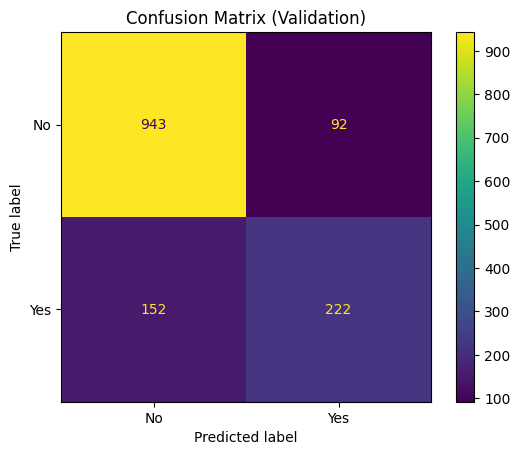

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("\nConfusion matrix (validation):\n", cm)

etiquetas = ['No', 'Yes']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etiquetas)
disp.plot()
plt.title("Confusion Matrix (Validation)")
plt.show()

In [245]:
# Metrics derived from the confusion matrix
print("Precision (pos='Yes'):", precision_score(y_val, y_pred, pos_label='Yes'))
print("Recall    (pos='Yes'):", recall_score(y_val, y_pred, pos_label='Yes'))
print("F1 score  (pos='Yes'):", f1_score(y_val, y_pred, pos_label='Yes'))


Precision (pos='Yes'): 0.7070063694267515
Recall    (pos='Yes'): 0.5935828877005348
F1 score  (pos='Yes'): 0.6453488372093024


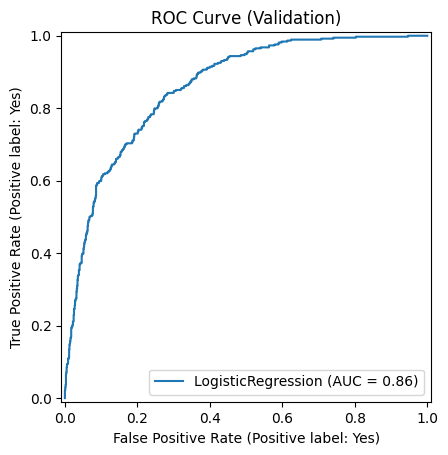

In [247]:
# ROC and PR curves (validation)
RocCurveDisplay.from_estimator(clf, X_val_prep, y_val)
plt.title("ROC Curve (Validation)")
plt.show()

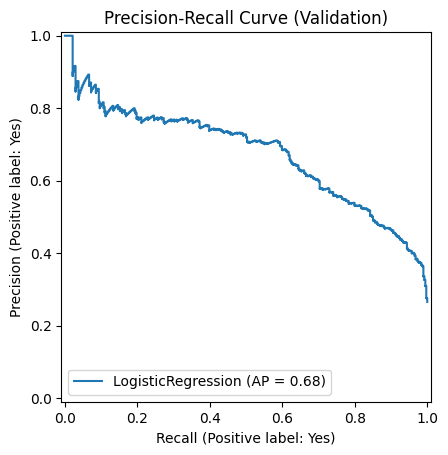

In [248]:
PrecisionRecallDisplay.from_estimator(clf, X_val_prep, y_val, pos_label='Yes')
plt.title("Precision-Recall Curve (Validation)")
plt.show()

In [251]:
# AUCs útiles para documentar
val_proba_yes = clf.predict_proba(X_val_prep)[:, list(clf.classes_).index('Yes')]
print("ROC-AUC (val):", roc_auc_score(y_val == 'Yes', val_proba_yes))
print("PR-AUC  (val):", average_precision_score(y_val == 'Yes', val_proba_yes))


ROC-AUC (val): 0.8596398770311814
PR-AUC  (val): 0.676406546841203


In [252]:
X_test_prep = data_preparer.transform(X_test)
y_pred_test = clf.predict(X_test_prep)

d:\Archivos de Usuario\Documents\Machine_Learning\ai_env\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [253]:
cm_test = confusion_matrix(y_test, y_pred_test)
print("\nConfusion matrix (test):\n", cm_test)


Confusion matrix (test):
 [[913 122]
 [179 195]]


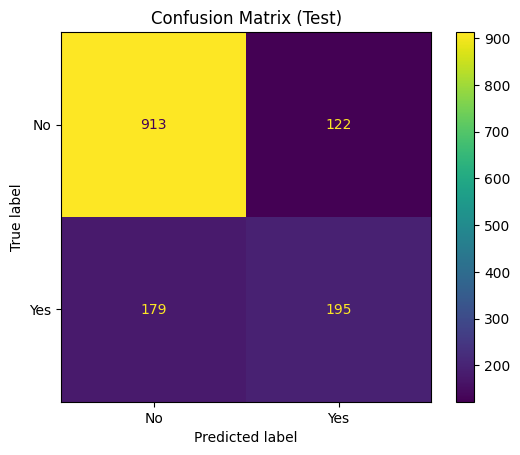

Precision (test, pos='Yes'): 0.6151419558359621
Recall    (test, pos='Yes'): 0.5213903743315508
F1 score  (test, pos='Yes'): 0.5643994211287988


In [254]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=etiquetas)
disp.plot()
plt.title("Confusion Matrix (Test)")
plt.show()

print("Precision (test, pos='Yes'):", precision_score(y_test, y_pred_test, pos_label='Yes'))
print("Recall    (test, pos='Yes'):", recall_score(y_test, y_pred_test, pos_label='Yes'))
print("F1 score  (test, pos='Yes'):", f1_score(y_test, y_pred_test, pos_label='Yes'))